# Fig4

## tobais Footprint Analysis

```shell
snakemake --configfile HK.yaml --use-conda --cores 20
snakemake --configfile TH.yaml --use-conda --cores 20
```

In [2695]:
temp <- readLines("/home/minghao/rgtdata/Homer_known.motifs.meme")

In [2696]:
index <- grep(temp,pattern = "MOTIF motif_")
temp[index] <- stringr::str_split(temp[index],pattern = "\\(" ,simplify = T)[,1]

In [2647]:
file_conn <- file("/home/minghao/rgtdata/Homer_known.motifs_v2.meme", "w")
for (s in temp) {
  cat(s, file = file_conn, "\n")
}
close(file_conn)

In [2742]:
motif_name <- stringr::str_split(list.files("/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/HK_output_v2/TFBS"),
                                 pattern = "_",simplify = T)[,1]
motif_name <- as.data.frame(motif_name)
motif_name$motif_lower_id <- tolower(motif_name$motif_name)
motif_name$index_name <- list.files("/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/HK_output_v2/TFBS")

```R
test <- stringr::str_split(list.files("/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/HK_output_v2/TFBS"),
                                 pattern = "_",simplify = T)[,1] %>% as.data.frame

write.table(x = test,file = "/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/meme_motif.txt",sep = "\t",col.names = F,row.names = F,quote = F)
```
temp

In [2739]:
temp_geneID_name <- geneID_name
temp_geneID_name$eggnog_Preferred_name <- tolower(temp_geneID_name$eggnog_Preferred_name)

In [2743]:
motif_name <- motif_name %>% inner_join(temp_geneID_name,by = c("motif_lower_id"="eggnog_Preferred_name")) %>% dplyr::select(3,4)

Warning message in inner_join(., temp_geneID_name, by = c(motif_lower_id = "eggnog_Preferred_name")):
"Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 177 of `x` matches multiple rows in `y`.
ℹ Row 22465 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning."


In [2746]:
write.table(unique(motif_name),"/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/motif2gene.txt",
            sep = "\t",quote = F,col.names = F,row.names = F)

In [2800]:
TH_tobias_res <- openxlsx::read.xlsx("/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/TH_output_v2/overview/bindetect_results.xlsx")
HK_tobias_res <- openxlsx::read.xlsx("/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/HK_output_v2/overview/bindetect_results.xlsx")

HK_tobias_res$Ctrl_Cold_pvalue <- as.numeric(HK_tobias_res$Ctrl_Cold_pvalue)
TH_tobias_res$Ctrl_Cold_pvalue <- as.numeric(TH_tobias_res$Ctrl_Cold_pvalue)

In [2801]:
HK_tobias_res <- HK_tobias_res %>% 
    arrange(Ctrl_Cold_pvalue) %>% 
    filter(Ctrl_Cold_pvalue < 1e-50 )#& abs(Ctrl_Cold_change) > 0.01

TH_tobias_res <- TH_tobias_res %>% 
    arrange(Ctrl_Cold_pvalue) %>% 
    filter(Ctrl_Cold_pvalue < 1e-50 )#& abs(Ctrl_Cold_change) > 0.01

In [2802]:
openxlsx::write.xlsx(list(HK = HK_tobias_res,TH = TH_tobias_res),
                     "/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/Tobias_res/filter_tobias_bindetect_res.xlsx")

In [2889]:
select_tobias_res <- openxlsx::read.xlsx("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/Tobias_res/副本filter_tobias_bindetect_res-PH.xlsx")

select_tobias_res$lower <- tolower(select_tobias_res$name)
match_tobias_res <- select_tobias_res %>% inner_join(temp_geneID_name,by = c("lower" = "eggnog_Preferred_name"))

unmatch_tobias_res <- select_tobias_res[!tolower(select_tobias_res$lower) %in% tolower(temp_geneID_name$eggnog_Preferred_name),]

Warning message in inner_join(., temp_geneID_name, by = c(lower = "eggnog_Preferred_name")):
"Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 17 of `x` matches multiple rows in `y`.
ℹ Row 22465 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning."


In [2830]:
openxlsx::write.xlsx(unmatch_tobias_res,"/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/Tobias_res/unmatch_tobias_res.xlsx")
openxlsx::write.xlsx(match_tobias_res,"/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/Tobias_res/match_tobias_res.xlsx")

In [2897]:
zebrafish_geneID2name <- read.delim("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/gene2name_database/Zebrafish_gene2name_biomart_v111.txt",sep = "\t",header = T)
zebrafish_geneID2name$Gene.Synonym <- tolower(zebrafish_geneID2name$Gene.Synonym)

match_tobias_res2 <- unmatch_tobias_res %>% inner_join(zebrafish_geneID2name,by = c("lower" = "Gene.Synonym"))
unmatch_tobias_res2 <- unmatch_tobias_res[!tolower(unmatch_tobias_res$lower) %in% tolower(zebrafish_geneID2name$Gene.Synonym),]

Warning message in inner_join(., zebrafish_geneID2name, by = c(lower = "Gene.Synonym")):
"Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 127 of `x` matches multiple rows in `y`.
ℹ Row 9352 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning."


In [2898]:
mouse_geneID2name <- read.delim("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/gene2name_database/mouse_gene2name_biomart_v111.txt",sep = "\t",header = T)
mouse_geneID2name$Gene.Synonym <- tolower(mouse_geneID2name$Gene.Synonym)

unmatch_tobias_res3 <- unmatch_tobias_res2[!tolower(unmatch_tobias_res2$lower) %in% tolower(mouse_geneID2name$Gene.Synonym),]
match_tobias_res3 <- unmatch_tobias_res2 %>% inner_join(mouse_geneID2name,by = c("lower" = "Gene.Synonym"))

openxlsx::write.xlsx(unmatch_tobias_res3,"/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/Tobias_res/unmatch_tobias_res3.xlsx")

Warning message in inner_join(., mouse_geneID2name, by = c(lower = "Gene.Synonym")):
"Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 85 of `x` matches multiple rows in `y`.
ℹ Row 59596 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning."


In [2901]:
library(stringr)
unmatch_tobias_res3$new_lower <- tolower(gsub("^C_","",str_extract(unmatch_tobias_res3$cluster, "C_[A-Za-z]+")))

In [2903]:
unmatch_tobias_res4 <- unmatch_tobias_res3[!unmatch_tobias_res3$new_lower %in% tolower(zebrafish_geneID2name$Gene.Synonym),]
match_tobias_res4 <- unmatch_tobias_res3 %>% inner_join(zebrafish_geneID2name,by = c("new_lower" = "Gene.Synonym"))

Warning message in inner_join(., zebrafish_geneID2name, by = c(new_lower = "Gene.Synonym")):
"Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 83 of `x` matches multiple rows in `y`.
ℹ Row 8196 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning."


In [2905]:
unmatch_tobias_res5 <- unmatch_tobias_res4[!unmatch_tobias_res4$new_lower %in% tolower(mouse_geneID2name$Gene.Synonym),]
match_tobias_res5 <- unmatch_tobias_res4 %>% inner_join(mouse_geneID2name,by = c("new_lower" = "Gene.Synonym"))

Warning message in inner_join(., mouse_geneID2name, by = c(new_lower = "Gene.Synonym")):
"Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 4 of `x` matches multiple rows in `y`.
ℹ Row 78831 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning."


In [2907]:
openxlsx::write.xlsx(unmatch_tobias_res5,"/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/Tobias_res/unmatch_tobias_res5.xlsx")

In [2909]:
unmatch_tobias_res5_rename <- read.delim("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/Tobias_res/res5-PH",sep = "\t")
unmatch_tobias_res5_rename$name <- tolower(unmatch_tobias_res5_rename$name)

In [2911]:
match_tobias_res6 <- unmatch_tobias_res5_rename %>% inner_join(temp_geneID_name,by = c("name" = "eggnog_Preferred_name"))

Warning message in inner_join(., temp_geneID_name, by = c(name = "eggnog_Preferred_name")):
"Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 10 of `x` matches multiple rows in `y`.
ℹ Row 4364 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning."


In [2949]:
mouse2tilapia <- read.delim("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/gene2name_database/mouse2tilapia.txt",sep = "\t") %>% 
    filter(.$Nile.tilapia.orthology.confidence..0.low..1.high. == 1)
zebrafish2tilapia <- read.delim("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/gene2name_database/zebrafish2tilapia.txt",sep = "\t") %>% 
    filter(.$Nile.tilapia.orthology.confidence..0.low..1.high. == 1)

In [2942]:
match_tobias_res5$new_lower <- NULL
match_tobias_res35 <- rbind(match_tobias_res3,match_tobias_res5) %>% unique
match_tobias_res35 <- match_tobias_res35 %>% left_join(mouse2tilapia,by = "Gene.stable.ID")

match_tobias_res4$new_lower <- NULL
match_tobias_res24 <- rbind(match_tobias_res2,match_tobias_res4) %>% unique
match_tobias_res24 <- match_tobias_res24 %>% left_join(zebrafish2tilapia,by = "Gene.stable.ID")

In [2954]:
match_tobias_res2345 <- rbind(match_tobias_res35,match_tobias_res24)
match_tobias_res2345$Nile.tilapia.orthology.confidence..0.low..1.high. <- NULL

In [2969]:
match_tobias_res2345 <- match_tobias_res2345 %>% 
    dplyr::select(1:12,15) %>% 
    dplyr::rename(gene = Nile.tilapia.gene.stable.ID)

In [2964]:
match_tobias_res$lower <- NULL
match_tobias_res16 <- rbind(match_tobias_res,match_tobias_res6) %>% dplyr::select(1:13)

In [2971]:
match_tobias_res_rbind <- rbind(match_tobias_res16,match_tobias_res2345)
match_tobias_res_rbind <- match_tobias_res_rbind %>% na.omit %>% unique

In [2978]:
moitf2gene <- match_tobias_res_rbind %>% dplyr::select(1,13)

In [ ]:
openxlsx::write.xlsx(moitf2gene,"/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/motif2gene/motif2gene.xlsx")

In [2988]:
write.table(moitf2gene,file = "/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/motif2gene/motif2gene.txt",
            sep = "\t",row.names = F,col.names = F,quote = F)

```shell

TOBIAS CreateNetwork --TFBS $(find /home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/HK_output_v2/TFBS -name "*_Ctrl_bound.bed") --origin /home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/motif2gene/motif2gene.txt --max-len 4 --outdir Ctrl_HK_network

TOBIAS CreateNetwork --TFBS $(find /home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/HK_output_v2/TFBS -name "*_Cold_bound.bed") --origin /home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/motif2gene/motif2gene.txt --max-len 4 --outdir Cold_HK_network

TOBIAS CreateNetwork --TFBS $(find /home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/TH_output_v2/TFBS -name "*_Ctrl_bound.bed") --origin /home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/motif2gene/motif2gene.txt --max-len 4 --outdir Ctrl_TH_network

TOBIAS CreateNetwork --TFBS $(find /home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/TH_output_v2/TFBS -name "*_Cold_bound.bed") --origin /home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/motif2gene/motif2gene.txt --max-len 4 --outdir Cold_TH_network

```

## Volcano plot

In [3184]:
HK_bindetect <- openxlsx::read.xlsx("/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/HK_output_v2/overview/bindetect_results.xlsx")
TH_bindetect <- openxlsx::read.xlsx("/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/TH_output_v2/overview/bindetect_results.xlsx")
motif2gene <- openxlsx::read.xlsx("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/motif2gene/motif2gene.xlsx")

HK_bindetect <- HK_bindetect[HK_bindetect$output_prefix %in% motif2gene$output_prefix,]
TH_bindetect <- TH_bindetect[TH_bindetect$output_prefix %in% motif2gene$output_prefix,]

In [3185]:
HK_bindetect$Ctrl_Cold_pvalue <- as.numeric(HK_bindetect$Ctrl_Cold_pvalue)
TH_bindetect$Ctrl_Cold_pvalue <- as.numeric(TH_bindetect$Ctrl_Cold_pvalue)

In [3186]:
TH_bindetect <- TH_bindetect %>% arrange(Ctrl_Cold_pvalue,desc(Ctrl_Cold_change))
HK_bindetect <- HK_bindetect %>% arrange(Ctrl_Cold_pvalue,desc(Ctrl_Cold_change))

top50_TH_bindetect <- TH_bindetect %>% arrange(Ctrl_Cold_pvalue,desc(Ctrl_Cold_change)) %>% slice_head(n = 50)
top50_HK_bindetect <- HK_bindetect %>% arrange(Ctrl_Cold_pvalue,desc(Ctrl_Cold_change)) %>% slice_head(n = 50)

In [3035]:
openxlsx::write.xlsx(HK_bindetect,"/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/Tobias_res/HK_bindetect.xlsx")
openxlsx::write.xlsx(TH_bindetect,"/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/Tobias_res/TH_bindetect.xlsx")

openxlsx::write.xlsx(top50_HK_bindetect,"/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/Tobias_res/top50_HK_bindetect.xlsx")
openxlsx::write.xlsx(top50_TH_bindetect,"/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/Tobias_res/top50_TH_bindetect.xlsx")

In [3187]:
TH_bindetect$sig <- "nosig"
TH_bindetect$sig[TH_bindetect$Ctrl_Cold_pvalue < 1e-80 & TH_bindetect$Ctrl_Cold_change > 0.04] <- "Ctrl"
TH_bindetect$sig[TH_bindetect$Ctrl_Cold_pvalue < 1e-80 & TH_bindetect$Ctrl_Cold_change < -0.04] <- "Cold"

HK_bindetect$sig <- "nosig"
HK_bindetect$sig[HK_bindetect$Ctrl_Cold_pvalue < 1e-80 & HK_bindetect$Ctrl_Cold_change > 0.04] <- "Ctrl"
HK_bindetect$sig[HK_bindetect$Ctrl_Cold_pvalue < 1e-80 & HK_bindetect$Ctrl_Cold_change < -0.04] <- "Cold"

In [3842]:
select_TF <- c("FOXO1","Foxo3","ETS","ETS1","TCP1","IRF3","JunD","Fra1","Fos","Atf3","Fra2","Jun-AP1","JunB","AP-1")
select_TF <- toupper(select_TF)
length(select_TF)

[1] 14

In [3844]:
TH_bindetect_label <- TH_bindetect %>% group_by(sig) %>% 
    slice_min(order_by = Ctrl_Cold_pvalue , n = 10) %>% 
    ungroup %>% 
    filter(sig != "nosig") %>% 
    dplyr::select(name,Ctrl_Cold_change,Ctrl_Cold_pvalue,sig) 

HK_bindetect_label <- HK_bindetect %>% group_by(sig) %>% 
    slice_min(order_by = Ctrl_Cold_pvalue , n = 10) %>% 
    ungroup %>% 
    filter(sig != "nosig") %>% 
    dplyr::select(name,Ctrl_Cold_change,Ctrl_Cold_pvalue,sig) 

HK_label_select <- HK_bindetect[apply(as.matrix(toupper(HK_bindetect$name)),1,function(x) any(sapply(select_TF, grepl, x))) ,c(2,10,11,13)]
TH_label_select <- TH_bindetect[apply(as.matrix(toupper(TH_bindetect$name)),1,function(x) any(sapply(select_TF, grepl, x))) ,c(2,10,11,13)]
                                      
HK_bindetect_label <- rbind(HK_bindetect_label,HK_label_select) %>% unique
TH_bindetect_label <- rbind(TH_bindetect_label,TH_label_select) %>% unique
rm(TH_label_select)
rm(HK_label_select)

In [3937]:
HK_bindetect_label$name

[1] "IRF3"      "FOXA1"     "IRF1"      "IDD5"      "Hoxd12"    "Mef2d"    
 [7] "IDD4"      "FoxD3"     "Oct4"      "SOL1"      "KLF10"     "Maz"      
[13] "KLF3"      "Klf9"      "Egr2"      "KLF6"      "KLF5"      "Sp1"      
[19] "Sp5"       "Sp2"       "TCP1"      "ETS1"      "Foxo3"     "ETS"      
[25] "Foxo1"     "Fos"       "Fra1"      "ETS:RUNX"  "AP-1"      "Atf3"     
[31] "Fosl2"     "Fra2"      "JunB"      "JunD"      "ETS:E-box" "Jun-AP1"

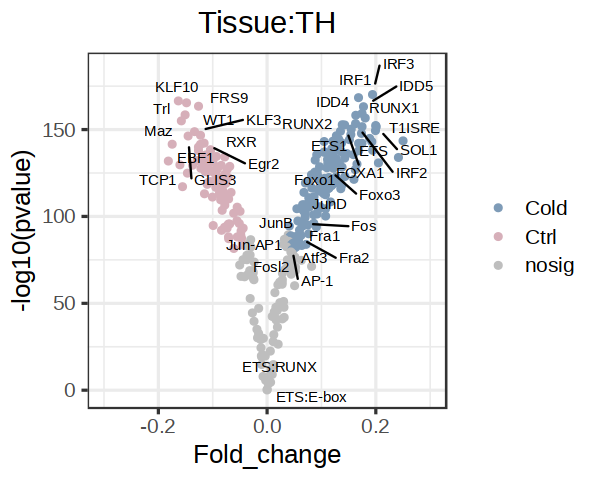

In [3938]:
options(repr.plot.width = 5,repr.plot.height = 4)
TH_volcano_plot <- ggplot(data = TH_bindetect,aes(x = -Ctrl_Cold_change ,y = -log10(Ctrl_Cold_pvalue),color = sig)) + 
    geom_point() +
    scale_color_manual(values = c("#7E9BB7","#D6AFB9","grey")) + 
    scale_x_continuous(limits = c(-0.3,0.3)) +
    scale_y_continuous(limits = c(-1,185)) +
    ggtitle("Tissue:TH") +
    labs(y = "-log10(pvalue)" , x = "Fold_change",color = NULL) + 
    theme_bw(base_size = 15) + 
    geom_text_repel(data = TH_bindetect_label ,aes(label = name , x = -Ctrl_Cold_change , y = -log10(Ctrl_Cold_pvalue)),
                    color = "black",max.overlaps = 50,size = 3,
                    nudge_x = 0.01, nudge_y = 0.01, point.padding = unit(0.8, "lines")) + 
    theme(plot.title = element_text(hjust = .5))
TH_volcano_plot

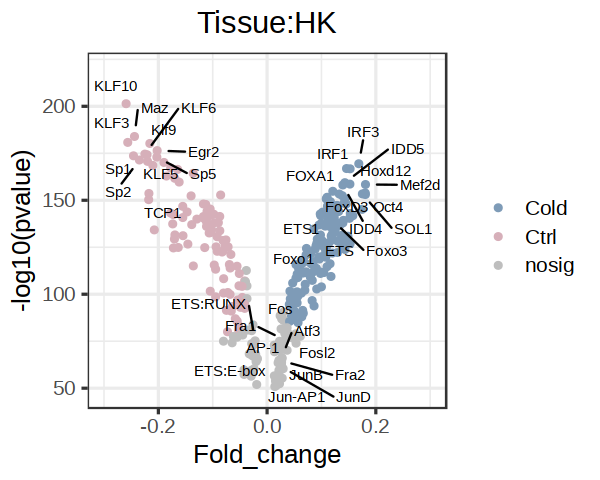

In [3939]:
options(repr.plot.width = 5,repr.plot.height = 4)
HK_volcano_plot <- ggplot(data = HK_bindetect,aes(x = -Ctrl_Cold_change ,y = -log10(Ctrl_Cold_pvalue),color = sig)) + 
    geom_point() +
    scale_color_manual(values = c("#7E9BB7","#D6AFB9","grey")) + 
    scale_x_continuous(limits = c(-0.3,0.3)) +
    scale_y_continuous(limits = c(48,220)) +
    ggtitle("Tissue:HK") +
    labs(y = "-log10(pvalue)" , x = "Fold_change",color = NULL) + 
    theme_bw(base_size = 15) + 
    geom_text_repel(data = HK_bindetect_label ,aes(label = name , x = -Ctrl_Cold_change , y = -log10(Ctrl_Cold_pvalue)),
                    color = "black",max.overlaps = 50,size = 3,#arrow = arrow(length = unit(0.01, "npc"),type = "open", ends = "last"),
                    nudge_x = 0.01, nudge_y = 0.01, point.padding = unit(0.8, "lines") ) + 
    theme(plot.title = element_text(hjust = .5) )
HK_volcano_plot

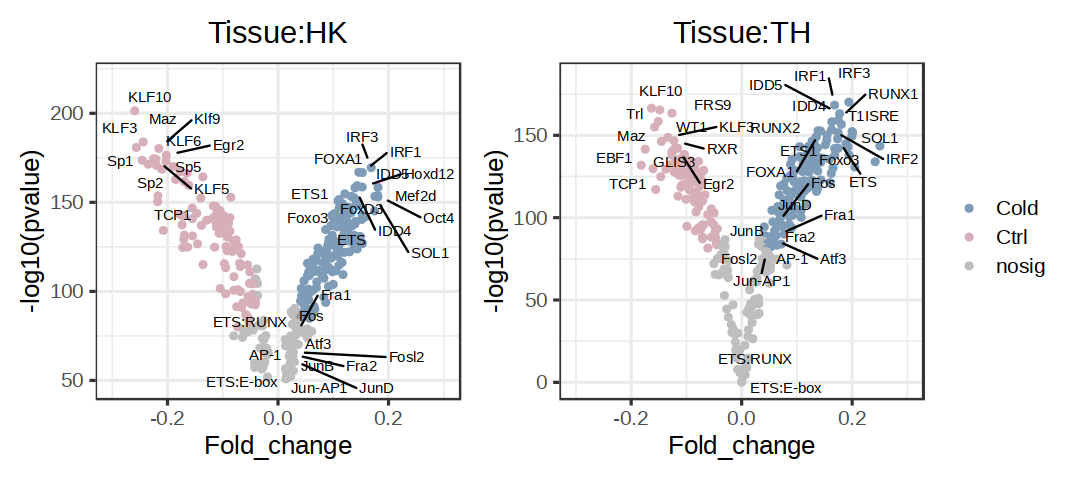

In [3837]:
options(repr.plot.width = 9,repr.plot.height = 4)
wrap_plots(list(HK_volcano_plot,TH_volcano_plot),nrow = 1,widths = 10,heights = 4,guides = "collect")

In [3838]:
pdf("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/plot/Fig4_motif_Volcano_plot.pdf",width = 8.5,height = 4)
wrap_plots(list(HK_volcano_plot,TH_volcano_plot),nrow = 1,widths = 10,heights = 4,guides = "collect")
dev.off()

png 
  2

## Venn plot

In [3209]:
intersect(HK_bindetect$name[HK_bindetect$sig == "Cold"],TH_bindetect$name[TH_bindetect$sig == "Cold"])

[1] "IRF3"         "FOXA1"        "IRF1"         "IDD5"         "Hoxd12"      
  [6] "Mef2d"        "IDD4"         "FoxD3"        "Oct4"         "SOL1"        
 [11] "Mef2c"        "Oct6"         "ERG"          "IRF2"         "PU.1:IRF8"   
 [16] "IRF8"         "PABPC1"       "T1ISRE"       "FOXK1"        "ETS1"        
 [21] "GT2"          "FOXP1"        "GABPA"        "Foxf1"        "EHF"         
 [26] "Mef2b"        "ELF3"         "COG1"         "PU.1"         "HNF1b"       
 [31] "JKD"          "FOXM1"        "ETV1"         "Mef2a"        "Foxa3"       
 [36] "Cdx2"         "Foxo3"        "Fli1"         "GTL1"         "Pitx1:Ebox"  
 [41] "FOXA1:AR"     "Foxa2"        "ETS"          "Hoxa10"       "NUC"         
 [46] "Chop"         "SGR5"         "MYNN"         "Hoxa13"       "Hoxc9"       
 [51] "FOXK2"        "HLF"          "IRF4"         "Pax7"         "Prop1"       
 [56] "MafF"         "Brn2"         "Phox2a"       "AtIDD11"      "Hoxd10"      
 [61] "EMB1789"      "ELF1"         "MGP"          "IDD7"         "Hoxa11"      
 [66] "Phox2b"       "Atf4"         "Foxo1"        "CDX4"         "Hoxd11"      
 [71] "DMRT1"        "Tcf3"         "IDD2"         "NFIL3"        "caudal"      
 [76] "ETV4"         "Lhx3"         "HAT1"         "PBX2"         "SPDEF"       
 [81] "Barx1"        "Pit1"         "HOXB13"       "NFkB-p65-Rel" "Tcf7"        
 [86] "Hoxa9"        "NFE2L2"       "Dlx3"         "TRPS1"        "Eomes"       
 [91] "Elk1"         "STAT6"        "LEF1"         "PGR"          "GATA3"       
 [96] "GT3a"         "Six4"         "Lhx2"         "Six1"         "HOXA9"       
[101] "RUNX1"        "Lhx1"         "Cux2"         "Tbr1"         "Gfi1b"       
[106] "SPL15"        "NF1:FOXA1"    "STAT4"        "STAT1"        "DLX1"        
[111] "SPL9"         "Tcf4"         "Atf1"         "CREB5"        "SPL11"       
[116] "TFE3"         "GATA"         "Cbf1"         "NFkB-p65"

In [3210]:
intersect(HK_bindetect$name[HK_bindetect$sig == "Ctrl"],TH_bindetect$name[TH_bindetect$sig == "Ctrl"])

[1] "KLF10"       "Maz"         "KLF3"        "Klf9"        "Egr2"       
 [6] "KLF6"        "KLF5"        "Sp1"         "Sp5"         "Sp2"        
[11] "KLF1"        "Egr1"        "Klf4"        "Gli2"        "WT1"        
[16] "Trl"         "GLIS3"       "GLI3"        "THRb"        "ERF2"       
[21] "FRS9"        "ZEB2"        "TCP1"        "ZEB1"        "TR4"        
[26] "NF1"         "Zic3"        "RXR"         "EBF1"        "ZNF711"     
[31] "E2A"         "Slug"        "NRF1"        "Zic2"        "Snail1"     
[36] "VDR"         "NRF"         "COUP-TFII"   "EAR2"        "THRa"       
[41] "Srebp2"      "PPARa"       "Erra"        "FHY3"        "E2F6"       
[46] "Smad4"       "RAP211"      "PPARE"       "RARg"        "Tlx?"       
[51] "FAR1"        "LEP"         "SF1"         "E2F7"        "Smad2"      
[56] "AR-halfsite" "E2F3"        "PAX5"        "Nr5a2"       "E2F1"       
[61] "NFkB-p50"    "HINFP"       "PRDM10"      "Bcl11a"      "Esrrb"      
[66] "ZFX"         "AS2"         "ZNF341"      "HIC1"        "EBF2"       
[71] "Pax8"        "M1BP"        "HNF4a"       "ZBTB12"      "Rbpj1"      
[76] "p63"         "MafK"

In [3825]:
options(repr.plot.width = 6,repr.plot.height = 6)
Fig4_Venn_Cold <- ggvenn(
  data = list(HK_Cold = HK_bindetect$name[HK_bindetect$sig == "Cold"],TH_Cold = TH_bindetect$name[TH_bindetect$sig == "Cold"]),         # 数据列表
  columns = NULL,           # 对选中的列名绘图，最多选择4个，NULL为默认全选
  show_elements = F,        # 当为TRUE时，显示具体的交集情况，而不是交集个数
  label_sep = "\n",         # 当show_elements = T时生效，分隔符 \n 表示的是回车的意思
  show_percentage = T,      # 显示每一组的百分比
  digits = 1,               # 百分比的小数点位数
  fill_color = c("#A5C496", "#C7988C", "#8891DB"), # 填充颜色
  fill_alpha = .6,         # 填充透明度
  stroke_color = "black",   # 边缘颜色
  stroke_alpha = 0.9,       # 边缘透明度
  stroke_size = 0.2,        # 边缘粗细
  stroke_linetype = "solid", # 边缘线条 # 实线：solid  虚线：twodash longdash 点：dotdash dotted dashed  无：blank
  set_name_color = "black", # 组名颜色
  set_name_size = 6,        # 组名大小
  text_color = "black",     # 交集个数颜色
  text_size = 5             # 交集个数文字大小
)

In [3827]:
pdf("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/plot/Fig4_motif_Cold_Venn_plot.pdf",width = 6,height = 6)
Fig4_Venn_Cold
dev.off()

png 
  2

In [3828]:
Fig4_Venn_Ctrl <- ggvenn(  
  data = list(HK_Ctrl = HK_bindetect$name[HK_bindetect$sig == "Ctrl"],TH_Ctrl = TH_bindetect$name[TH_bindetect$sig == "Ctrl"]),         # 数据列表
  columns = NULL,           # 对选中的列名绘图，最多选择4个，NULL为默认全选
  show_elements = F,        # 当为TRUE时，显示具体的交集情况，而不是交集个数
  label_sep = "\n",         # 当show_elements = T时生效，分隔符 \n 表示的是回车的意思
  show_percentage = T,      # 显示每一组的百分比
  digits = 1,               # 百分比的小数点位数
  fill_color = c("#A5C496", "#C7988C", "#8891DB"), # 填充颜色
  fill_alpha = .6,         # 填充透明度
  stroke_color = "black",   # 边缘颜色
  stroke_alpha = 0.9,       # 边缘透明度
  stroke_size = 0.2,        # 边缘粗细
  stroke_linetype = "solid", # 边缘线条 # 实线：solid  虚线：twodash longdash 点：dotdash dotted dashed  无：blank
  set_name_color = "black", # 组名颜色
  set_name_size = 6,        # 组名大小
  text_color = "black",     # 交集个数颜色
  text_size = 5             # 交集个数文字大小
)

In [3829]:
pdf("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/plot/Fig4_motif_Ctrl_Venn_plot.pdf",width = 6,height = 6)
Fig4_Venn_Ctrl
dev.off()

png 
  2

## heatmap

In [3214]:
HK_bindetect2 <- HK_bindetect %>% left_join(motif2gene,by = "output_prefix")
TH_bindetect2 <- TH_bindetect %>% left_join(motif2gene,by = "output_prefix")

In [3248]:
#HK
DEG_RNA[,c("log2FoldChange","padj","tissue","gene")]  %>% 
    filter(tissue == "HK") %>% 
    unique %>% right_join(HK_bindetect2,by = c("gene" = "gene")) %>% na.omit %>% 
    dplyr::select(log2FoldChange,name,Ctrl_Cold_change,sig) %>% filter(sig != "nosig") -> HK_bindetect3
HK_bindetect3$unique_name <- make.unique(HK_bindetect3$name)
#TH
DEG_RNA[,c("log2FoldChange","padj","tissue","gene")]  %>% 
    filter(tissue == "TH") %>% 
    unique %>% right_join(TH_bindetect2,by = c("gene" = "gene")) %>% na.omit %>% 
    dplyr::select(log2FoldChange,name,Ctrl_Cold_change,sig) %>% filter(sig != "nosig") -> TH_bindetect3
TH_bindetect3$unique_name <- make.unique(TH_bindetect3$name)

In [3264]:
#HK
Footprint_heatmap_HK <- HK_bindetect3[,c(3,1,5)] %>% tibble::column_to_rownames(var = "unique_name") %>% 
    arrange(Ctrl_Cold_change)
Footprint_heatmap_HK$Ctrl_Cold_change <- -Footprint_heatmap_HK$Ctrl_Cold_change
#TH
Footprint_heatmap_TH <- TH_bindetect3[,c(3,1,5)] %>% tibble::column_to_rownames(var = "unique_name") %>% 
    arrange(Ctrl_Cold_change)
Footprint_heatmap_TH$Ctrl_Cold_change <- -Footprint_heatmap_TH$Ctrl_Cold_change

In [3307]:
Heatmap(matrix = Footprint_heatmap_HK[,1],border = "black",
        show_row_names = F,show_column_names = F,
        cluster_columns = F,cluster_rows = F,
        width = unit(1, "cm"),
        heatmap_legend_param = list(
             title='TF binding score Fold change',
             title_gp = gpar(fontsize = 14),
             labels_gp = gpar(fontsize = 14),
             border='black')) -> Footprint_heatmap_HK_p1

Heatmap(matrix = Footprint_heatmap_HK[,2],border = "black",
        show_row_names = F,show_column_names = F,
        cluster_columns = F,cluster_rows = F,
        width = unit(1, "cm"),
        heatmap_legend_param = list(
             title='Fold change',
             title_gp = gpar(fontsize = 14),
             labels_gp = gpar(fontsize = 14),
             border='black')) -> Footprint_heatmap_HK_p2

In [3308]:
Heatmap(matrix = Footprint_heatmap_TH[,1],border = "black",
        show_row_names = F,show_column_names = F,
        cluster_columns = F,cluster_rows = F,
        width = unit(1, "cm"),
        heatmap_legend_param = list(
             title='TF binding score Fold change',
             title_gp = gpar(fontsize = 14),
             labels_gp = gpar(fontsize = 14),
             border='black')) -> Footprint_heatmap_TH_p1

Heatmap(matrix = Footprint_heatmap_TH[,2],border = "black",
        show_row_names = F,show_column_names = F,
        cluster_columns = F,cluster_rows = F,
        width = unit(1, "cm"),
        heatmap_legend_param = list(
             title='Fold change',
             title_gp = gpar(fontsize = 14),
             labels_gp = gpar(fontsize = 14),
             border='black')) -> Footprint_heatmap_TH_p2

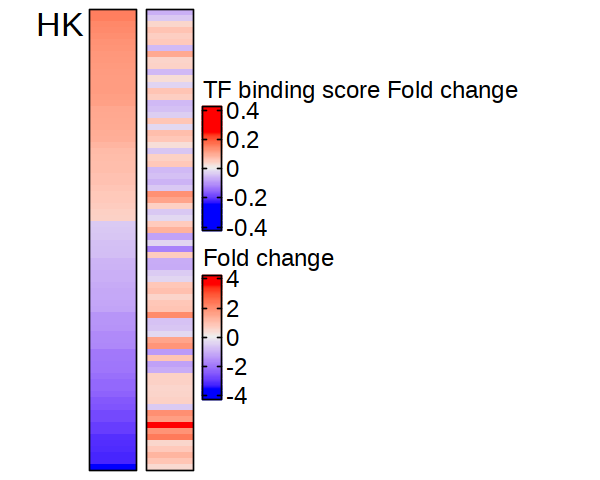

In [3327]:
draw(Footprint_heatmap_HK_p1 + Footprint_heatmap_HK_p2)
grid.text("HK", x = unit(0.1, "npc"), y = unit(0.95, "npc"), 
          just = "center", gp = gpar(fontsize = 20))

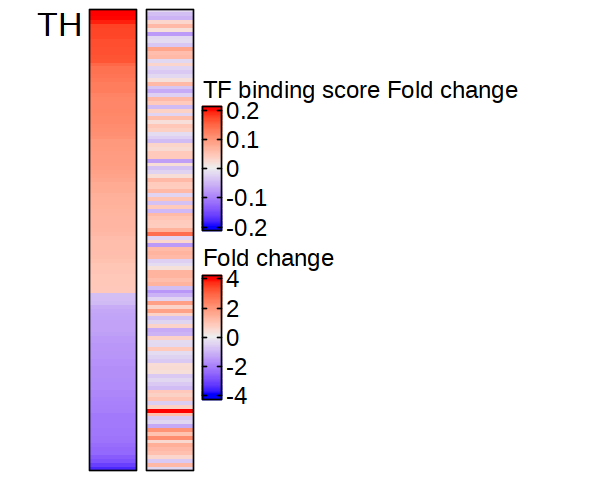

In [3328]:
draw(Footprint_heatmap_TH_p1 + Footprint_heatmap_TH_p2)
grid.text("TH", x = unit(0.1, "npc"), y = unit(0.95, "npc"), 
          just = "center", gp = gpar(fontsize = 20))

In [3331]:
Footprint_heatmap_HK$cor <- Footprint_heatmap_HK$Ctrl_Cold_change * Footprint_heatmap_HK$log2FoldChange
Footprint_heatmap_TH$cor <- Footprint_heatmap_TH$Ctrl_Cold_change * Footprint_heatmap_TH$log2FoldChange

In [3334]:
openxlsx::write.xlsx(Footprint_heatmap_HK %>% tibble::rownames_to_column(var = "TF"),
                     "/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/Tobias_res/Footprint_heatmap_HK.xlsx")
openxlsx::write.xlsx(Footprint_heatmap_TH %>% tibble::rownames_to_column(var = "TF"),
                     "/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/Tobias_res/Footprint_heatmap_TH.xlsx")

In [3341]:
Footprint_heatmap_HK2 <- Footprint_heatmap_HK %>% filter(cor > 0)
Footprint_heatmap_TH2 <- Footprint_heatmap_TH %>% filter(cor > 0)

In [3364]:
Heatmap(matrix = Footprint_heatmap_HK2 %>% select(1),border = "black",
        row_names_side = "left",
        show_row_names = T,show_column_names = F,
        cluster_columns = F,cluster_rows = F,
        width = unit(1, "cm"),
        heatmap_legend_param = list(
             title='TF binding score Fold change',
             title_gp = gpar(fontsize = 14),
             labels_gp = gpar(fontsize = 14),
             border='black')) -> Footprint_heatmap_HK_p3

Heatmap(matrix = Footprint_heatmap_HK2 %>% select(2),border = "black",
        show_row_names = F,show_column_names = F,
        cluster_columns = F,cluster_rows = F,
        width = unit(1, "cm"),
        heatmap_legend_param = list(
             title='Fold change',
             title_gp = gpar(fontsize = 14),
             labels_gp = gpar(fontsize = 14),
             border='black')) -> Footprint_heatmap_HK_p4

Warning message:
"The input is a data frame-like object, convert it to a matrix."


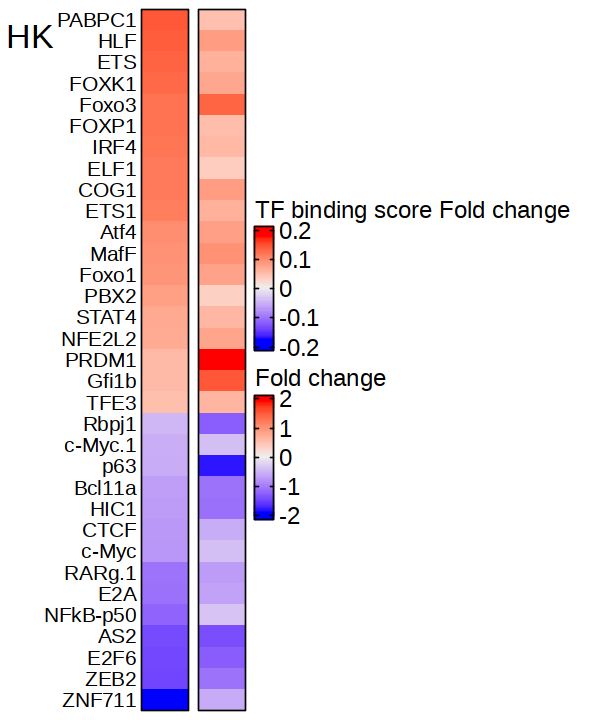

In [3833]:
options(repr.plot.width = 5,repr.plot.height = 6)
draw(Footprint_heatmap_HK_p3 + Footprint_heatmap_HK_p4)
grid.text("HK", x = unit(0.05, "npc"), y = unit(0.95, "npc"), 
          just = "center", gp = gpar(fontsize = 20))

In [3831]:
pdf("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/plot/Fig4_HK_heatmap.pdf",width = 5,height = 8)
options(repr.plot.width = 5,repr.plot.height = 8)
draw(Footprint_heatmap_HK_p3 + Footprint_heatmap_HK_p4)
grid.text("HK", x = unit(0.05, "npc"), y = unit(0.95, "npc"), 
          just = "center", gp = gpar(fontsize = 20))
dev.off()

png 
  2

In [3894]:
heatmap_label <- data.frame(gene = select_TF,
                    name = select_TF)
row_ha <- rowAnnotation(link = anno_mark(at = which(toupper(rownames(Footprint_heatmap_TH2)) %in% heatmap_label$gene), 
                                         labels = rownames(Footprint_heatmap_TH2)[toupper(rownames(Footprint_heatmap_TH2)) %in% heatmap_label$gene],
                                         labels_gp = gpar(fontsize = 10),which = "row"))

In [3900]:
rownames(Footprint_heatmap_TH2)

[1] "IRF3"        "IDD5"        "GABPA"       "HLF"         "HLF.1"      
 [6] "IDD4"        "EMB1789"     "COG1"        "JKD"         "AtIDD11"    
[11] "FOXK1"       "Tcf4"        "TFE3"        "TFE3.1"      "FOXP1"      
[16] "Foxo3"       "TRPS1"       "Atf4"        "SPL15"       "SPL9"       
[21] "STAT6"       "STAT6.1"     "IDD7"        "Atf7"        "Atf7.1"     
[26] "IDD2"        "JunD"        "SPL11"       "MafF"        "Six4"       
[31] "c-Jun-CRE"   "c-Jun-CRE.1" "Fos"         "Fra1"        "NFE2L2"     
[36] "Atf3"        "Fra2"        "SGR5"        "PBX2"        "Jun-AP1"    
[41] "JunB"        "JunB.1"      "AP-1"        "Bcl11a"      "M1BP"       
[46] "E2F7"        "E2F1"        "E2A"         "LEP"         "E2F3.1"     
[51] "Smad2"       "NFkB-p50"    "AS2"         "Srebp2"      "Smad4.2"    
[56] "ZEB1"        "KLF5"        "KLF5.1"      "TR4"         "RARg.1"     
[61] "E2F6"        "E2F6.1"      "ZNF711"      "TCP1"

In [3896]:
Heatmap(matrix = Footprint_heatmap_TH2 %>% select(1),border = "black",
        right_annotation = row_ha,
        row_names_side = "left",
        show_row_names = F,show_column_names = F,
        cluster_columns = F,cluster_rows = F,
        width = unit(1, "cm"),
        heatmap_legend_param = list(
             title='TF binding score Fold change',
             title_gp = gpar(fontsize = 14),
             labels_gp = gpar(fontsize = 14),
             border='black')) -> Footprint_heatmap_TH_p3

Heatmap(matrix = Footprint_heatmap_TH2 %>% select(2),border = "black",
        show_row_names = F,show_column_names = F,
        cluster_columns = F,cluster_rows = F,
        width = unit(1, "cm"),
        heatmap_legend_param = list(
             title='Fold change',
             title_gp = gpar(fontsize = 14),
             labels_gp = gpar(fontsize = 14),
             border='black')) -> Footprint_heatmap_TH_p4

Warning message:
"The input is a data frame-like object, convert it to a matrix."
Warning message:
"The input is a data frame-like object, convert it to a matrix."


In [3897]:
pdf("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/plot/Fig4_TH_heatmap.pdf",width = 5,height = 4.5)
options(repr.plot.width = 5,repr.plot.height = 4.5)
draw(Footprint_heatmap_TH_p3 + Footprint_heatmap_TH_p4)
grid.text("TH", x = unit(0.05, "npc"), y = unit(0.95, "npc"), 
          just = "center", gp = gpar(fontsize = 20))
dev.off()

png 
  2

## motif logo

In [10]:
library(dplyr)
library(ggplot2)

In [2]:
contents <- readLines("/home/minghao/rgtdata/Homer_known.motifs")

In [3]:
begin_indexes = grep("^>", contents)
last_index = length(contents) + 1
begin_indexes = c(begin_indexes, last_index)
dataframe_list = list()

In [7]:
# 循环遍历所有的部分
for (i in 1:(length(begin_indexes) - 1)) {
  begin = begin_indexes[i]
  end = begin_indexes[i + 1] - 1  # 最后一行是下一个部分的开头，所以我们要 - 1
  segment = contents[(begin + 1) :end]
  name = strsplit(contents[begin],split = "\t")[[1]][2]
    
  # 把部分内容转成数据框并添加到列表
  df = do.call(rbind,strsplit(segment,split = "\t")) %>% as.data.frame 
  colnames(df) <- c("A","C","G","T")  
  dataframe_list[[name]] = apply(df,2,as.numeric)
}

In [8]:
names(dataframe_list) <- stringr::str_split(names(dataframe_list),pattern = "/",simplify = T)[,1]

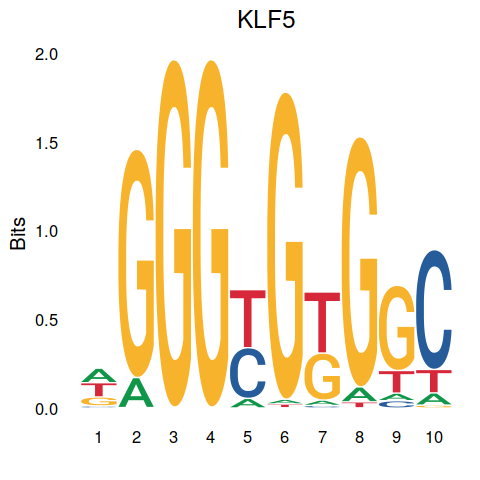

In [12]:
options(repr.plot.width = 4,repr.plot.height = 4)
ggseqlogo::ggseqlogo( t(dataframe_list[[grep(names(dataframe_list),pattern = "klf5",ignore.case = T)]])) + 
        ggtitle("KLF5") + 
        theme(plot.title = element_text(hjust = .5))

In [3931]:
pdf("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/plot/Fig4_KLF5_motif.pdf",width = 4,height = 4)
ggseqlogo::ggseqlogo( t(dataframe_list[[grep(names(dataframe_list),pattern = "klf5",ignore.case = T)]])) + 
        ggtitle("KLF5") + 
        theme(plot.title = element_text(hjust = .5))
dev.off()

png 
  2

In [3932]:
pdf("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/plot/Fig4_Foxo1_motif.pdf",width = 4,height = 4)
ggseqlogo::ggseqlogo( t(dataframe_list[[grep(names(dataframe_list),pattern = "foxo1",ignore.case = T)]])) + 
        ggtitle("Foxo1" ) + 
        theme(plot.title = element_text(hjust = .5))
dev.off()

png 
  2

In [3933]:
pdf("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/plot/Fig4_ZNF711_motif.pdf",width = 4,height = 4)
ggseqlogo::ggseqlogo( t(dataframe_list[[grep(names(dataframe_list),pattern = "znf711",ignore.case = T)]])) + 
        ggtitle("znf711") + 
        theme(plot.title = element_text(hjust = .5))
dev.off()

png 
  2

In [3930]:
pdf("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/plot/Fig4_AP-1_motif.pdf",width = 4,height = 4)
ggseqlogo::ggseqlogo( t(dataframe_list[[grep(names(dataframe_list),pattern = "ap-1",ignore.case = T)]])) + 
        ggtitle("AP-1") + 
        theme(plot.title = element_text(hjust = .5))
dev.off()

png 
  2

In [3520]:
DEG_RNA_nofilter <- openxlsx::read.xlsx("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/Bulk_RNA_output/Tilapia_ColdvsCtrl_DEG_RNA_nofilter.xlsx")

## cytoscape_version3
> Process the Network results obtained by Tobias by removing: 1. Downstream reverse regulation of upstream. 2. Mutual regulation between peers. 3. Multiple upstream TFs regulating the same downstream gene. 4. Keep only the 3 level network. Obtain a simplified TF transcription factor regulatory network. Import into Cytoscape for visualization.

In [1]:
 TF_level2_function <- function(input,TF.level1){
    fnode6 <- input %>% dplyr::filter(log2FoldChange > 1)
    TF.level2 <- fnode6 %>% dplyr::filter(Level == 2) %>% .$Motif
    return(TF.level2)
}

 TF_level3_function <- function(fnode_input,TF.level1,TF.level2,motif2gene,DEG_RNA2.HK){
    fnode.level3 <- fnode_input %>% filter(Source %in% TF.level2, Level == 2) %>% 
                          group_by(Target) %>% slice(1) %>% ungroup %>%   # only take 1 level3
                          filter(! Target %in% TF.level2) %>% filter(! Target %in% TF.level1) 
     
    motif2gene_uniq <- motif2gene %>% select(Motif,gene) %>% distinct()  
    fnode.level3.anno <- fnode.level3 %>% mutate(Motif = Target) %>% group_by(Motif) %>% 
                     dplyr::select(Source,Level,Motif) %>% distinct()  %>% 
                     left_join(motif2gene_uniq,by="Motif") %>% ungroup %>% 
                     group_by(gene) %>% left_join(DEG_RNA2.HK,by="gene") %>% ungroup %>% na.omit
    temp <<- fnode.level3.anno
    TF.level3 <- unique(as.character(fnode.level3.anno$Motif))
    return(TF.level3) 
}

Contruct_network <- function(TF.level1,TF.level2.u,TF.level3.u,motif2gene,fnode.level3.anno3,DEG_RNA2.HK){
    motif2gene_uniq <- motif2gene %>% select(Motif,gene) %>% distinct()
    
    cyto.edge <- data.frame(Source = rep(TF.level1,n=length(TF.level2.u)),Target = TF.level2.u) # level1
    cyto.edge2 <- fnode.level3.anno3[,c("Source","Motif")]
    names(cyto.edge2)[2] <- "Target"
    cyto.edge.total <- rbind(cyto.edge,cyto.edge2)
    cyto.edge.total <- distinct(cyto.edge.total)
    
    cyto.node <- data.frame(Target = unique(c(cyto.edge.total$Source,cyto.edge.total$Target)))
    cyto.node2 <- motif2gene_uniq %>% filter(Motif %in% cyto.node$Target) %>% group_by(gene) %>% 
             left_join(DEG_RNA2.HK,by="gene") %>% ungroup %>% na.omit %>% group_by(Motif) %>% slice(1)
    
    cyto.node2$level <- "none"
    cyto.node2[cyto.node2$Motif %in% TF.level1,]$level <- "level1"
    cyto.node2[cyto.node2$Motif %in% TF.level2.u,]$level <- "level2"
    cyto.node2[cyto.node2$Motif %in% TF.level3.u,]$level <- "level3"

    print(table(cyto.node2$level))
    cyto.edge.total$Source <- gsub("_MOTIF_M_[0-9]{1,4}","",cyto.edge.total$Source)
    cyto.edge.total$Target <- gsub("_MOTIF_M_[0-9]{1,4}","",cyto.edge.total$Target)
    cyto.node2$Motif <- gsub("_MOTIF_M_[0-9]{1,4}","",cyto.node2$Motif)
    
    return(list(edge = cyto.edge.total,node = cyto.node2))
}

simplify_network <- function(path,motif,tissues,TF_level1){    
    setwd(path)
    Ffile <- grep(paste0("^",motif),list.files(),value=T,ignore.case = T)

    # read the paths
    fnet <- read.delim(Ffile[2],sep="\t",h=T)
    fnode <- read.delim(Ffile[1],sep="\t",h=T)
    
    # load motif2gene table
    motif2gene <- read.delim("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/motif2gene/motif2gene.txt",
                             h=F,sep="\t") %>% unique
    motif2gene$Motif <- toupper(motif2gene$V1)
    names(motif2gene)[2] <- "gene"
    
    #read RNA_DESeq2 DEGs result
    DEG_RNA <- openxlsx::read.xlsx("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/Bulk_RNA_output/Tilapia_ColdvsCtrl_DEG_RNA.xlsx")
    DEG_RNA$sig <- "none"
    DEG_RNA[DEG_RNA$padj < .05 & DEG_RNA$log2FoldChange > 1,]$sig <- "up"
    DEG_RNA[DEG_RNA$padj < .05 & DEG_RNA$log2FoldChange < -1,]$sig <- "down"
    
    fnode2 <- fnode %>% arrange(Level)%>% select(Source,Level) %>% group_by(Source)%>% slice(1)
    names(fnode2)[1] <- "Motif"
    fnode3 <- fnode2 %>% group_by(Motif) %>% left_join(motif2gene,by="Motif") %>% ungroup 
    fnode4 <- na.omit(fnode3)
    
    DEG_RNA2.HK <- DEG_RNA[c(1:7,8,9,12)] %>% filter(tissue == tissues)%>%  distinct()
    fnode5 <- fnode4 %>% group_by(gene) %>% left_join(DEG_RNA2.HK,by="gene") %>% ungroup %>% na.omit
    
    TF.level1 <- TF_level1
    TF.level2 <- TF_level2_function(input = fnode5,TF.level1 = TF.level1)
    #print(class(TF.level2))
    #return(TF.level2)
    TF.level3 <- TF_level3_function(fnode_input = fnode,TF.level1 = TF.level1,TF.level2 = TF.level2,
                                    motif2gene = motif2gene,DEG_RNA2.HK = DEG_RNA2.HK)
    
    # keep the unique of each level
    TF.level2.u <- setdiff(unique(TF.level2),TF.level1)
    TF.level3.u <- setdiff(unique(TF.level3),c(TF.level2,TF.level1))
    
    print(c(length(TF.level1),length(TF.level2.u),length(TF.level3.u)))
    
    res_list <- Contruct_network(TF.level1 = TF.level1,TF.level2.u = TF.level2.u,
                     TF.level3.u = TF.level3.u,motif2gene = motif2gene,
                     fnode.level3.anno3 = temp,DEG_RNA2.HK = DEG_RNA2.HK)
     
    return(res_list) 
    #return(list(level1 = TF.level1,level2 = TF.level2.u,level3 = TF.level3.u))
}

In [ ]:
DEG_RNA[grep("stat1",DEG_RNA$Gene.name,ignore.case = T),]
DEG_RNA[grep("klf5",DEG_RNA$Gene.name,ignore.case = T),]
DEG_RNA[grep("foxo3",DEG_RNA$Gene.name,ignore.case = T),]

In [ ]:
FOXO1_HK_network <- simplify_network(path = "/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/Cold_HK_network",
                         motif = "FOXO1",tissues = "HK",TF_level1 = "FOXO1_MOTIF_M_122")

setwd("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/plot_TRN_data/ner_version")
write.table(FOXO1_HK_network[["node"]],file="20240328_HK_foxo1_node.txt",quote=F,sep="\t",row.names = F)
write.table(FOXO1_HK_network[["edge"]],file="20240328_HK_foxo1_edge.txt",quote=F,sep="\t",row.names = F)

In [ ]:
STAT1_HK_network <- simplify_network(path = "/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/Cold_HK_network",
                         motif = "STAT1",tissues = "HK",TF_level1 = "STAT1_MOTIF_M_357")

setwd("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/plot_TRN_data/ner_version")
write.table(STAT1_HK_network[["node"]],file="20240328_HK_stat1_node.txt",quote=F,sep="\t",row.names = F)
write.table(STAT1_HK_network[["edge"]],file="20240328_HK_stat1_edge.txt",quote=F,sep="\t",row.names = F)

In [ ]:
STAT1_TH_network <- simplify_network(path = "/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/Cold_TH_network",
                         motif = "STAT1",tissues = "TH",TF_level1 = "STAT1_MOTIF_M_357")

setwd("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/plot_TRN_data/ner_version")
write.table(STAT1_TH_network[["node"]],file="20240328_TH_stat1_node.txt",quote=F,sep="\t",row.names = F)
write.table(STAT1_TH_network[["edge"]],file="20240328_TH_stat1_edge.txt",quote=F,sep="\t",row.names = F)

In [ ]:
KLF5_HK_network <- simplify_network(path = "/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/Cold_HK_network",
                         motif = "KLF5",tissues = "HK",TF_level1 = "KLF5_MOTIF_M_194")

setwd("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/plot_TRN_data/ner_version")
write.table(KLF5_HK_network[["node"]],file="20240328_HK_klf5_node.txt",quote=F,sep="\t",row.names = F)
write.table(KLF5_HK_network[["edge"]],file="20240328_HK_klf5_edge.txt",quote=F,sep="\t",row.names = F)

In [ ]:
KLF5_TH_network <- simplify_network(path = "/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/Cold_TH_network",
                         motif = "KLF5",tissues = "TH",TF_level1 = "KLF5_MOTIF_M_194")

setwd("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/plot_TRN_data/ner_version")
write.table(KLF5_TH_network[["node"]],file="20240328_TH_klf5_node.txt",quote=F,sep="\t",row.names = F)
write.table(KLF5_TH_network[["edge"]],file="20240328_TH_klf5_edge.txt",quote=F,sep="\t",row.names = F)

In [ ]:
FOXO3_HK_network <- simplify_network(path = "/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/Cold_HK_network",
                         motif = "FOXO3",tissues = "HK",TF_level1 = "FOXO3_MOTIF_M_123")

setwd("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/plot_TRN_data/ner_version")
write.table(FOXO3_HK_network[["node"]],file="20240328_HK_foxo3_node.txt",quote=F,sep="\t",row.names = F)
write.table(FOXO3_HK_network[["edge"]],file="20240328_HK_foxo3_edge.txt",quote=F,sep="\t",row.names = F)

In [ ]:
FOXO3_TH_network <- simplify_network(path = "/home/minghao/miniconda3/envs/tobais_snakemake/TOBIAS_snakemake/Cold_TH_network",
                         motif = "FOXO3",tissues = "TH",TF_level1 = "FOXO3_MOTIF_M_123")

setwd("/home/minghao/workbase/16_Tilapia_Cold_BulkRNA-ATAC_jiaohe/output/TRN/plot_TRN_data/ner_version")
write.table(FOXO3_TH_network[["node"]],file="20240328_TH_foxo3_node.txt",quote=F,sep="\t",row.names = F)
write.table(FOXO3_TH_network[["edge"]],file="20240328_TH_foxo3_edge.txt",quote=F,sep="\t",row.names = F)